<a href="https://colab.research.google.com/github/ImtiazAhammad/CarPricePredction/blob/main/CarPricePredction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import dependenceys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [ ]:
# Data Processing
cd = pd.read_csv("/content/car data.csv")

In [ ]:
# first 5 rows of dataset
cd.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
cd.shape

(301, 9)

In [ ]:
# checking the null values
cd.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
# Getting some information about the dataset
cd.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
#checking the destrubution of catagorical data
print(cd.Fuel_Type.value_counts())
print(cd.Seller_Type.value_counts())
print(cd.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [ ]:
# Encoding the catagorical data
# ----------------------------
# Encoding Fuel_Type column
cd.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)

# Encoding Seller_Type column
cd.replace({'Seller_Type':{'Dealer':0, 'Individual':1,}}, inplace=True)

# Encoding Transmission column
cd.replace({'Transmission':{'Manual':0, 'Automatic':1,}}, inplace=True)


In [ ]:
cd.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [ ]:
# Spliting Data into Trainning and Test Data
X = cd.drop(['Car_Name', 'Selling_Price'], axis=1)
Y = cd['Selling_Price']

In [ ]:
x_train,x_test, y_train, y_test = train_test_split(X,Y,test_size=0.1, random_state=2)

In [ ]:
# Model Building

model1 = LinearRegression()

In [ ]:
# Fitting the data into model
model1.fit(x_train,y_train)

LinearRegression()

In [ ]:
# Model Evaluation

trainnig_data_predction = model1.predict(x_train)

In [ ]:
# R squere error

error_score = metrics.r2_score(y_train,trainnig_data_predction)

print("R squered error :", error_score)

R squered error : 0.8799451660493711


In [ ]:
# define input data as a tuple
input_data = (2014,5.59,27000,0,0,0,0)

# convert input data to a numpy array and reshape it
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# make a prediction using the trained classifier model
prediction = model1.predict(input_data_reshaped)
print(prediction)

[3.83901354]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


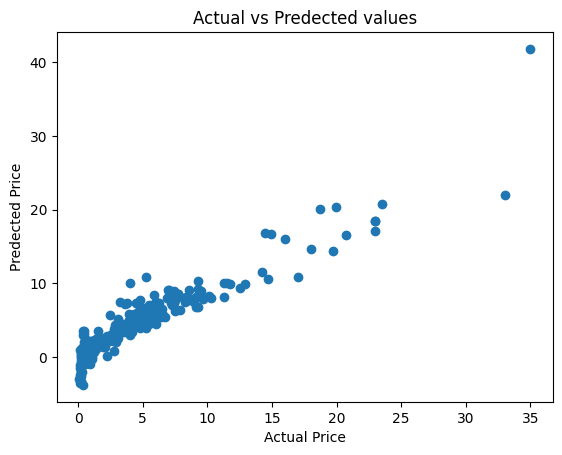

In [ ]:
# visualize actual and predecitve values

plt.scatter(y_train, trainnig_data_predction)
plt.xlabel("Actual Price")
plt.ylabel("Predected Price")
plt.title("Actual vs Predected values")
plt.show()

In [ ]:
import pickle

In [ ]:
filename = 'car_price_model.sav'
pickle.dump(model1, open(filename, 'wb'))

In [ ]:
#loading saved model
loaded_model = pickle.load(open('car_price_model.sav','rb'))

In [ ]:
for column in X.columns:
  print(column)

Year
Present_Price
Kms_Driven
Fuel_Type
Seller_Type
Transmission
Owner
